In [1]:
import numpy as np
from cdlib import algorithms, viz, evaluation
import networkx as nx
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [2]:
with open('../pkl/global_travel_tensor_sorted.pkl', 'rb') as f:
    travel_tensors_raw = pickle.load(f) 

Text(0.5, 0, 'Country numbering')

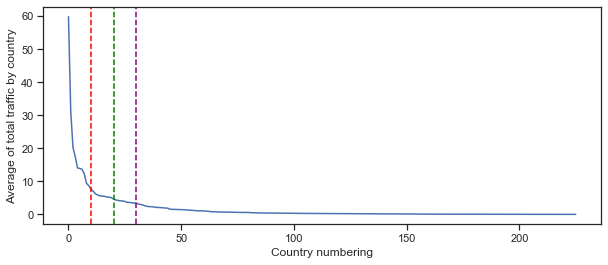

In [3]:
# How to set a cutline
plt.figure(figsize=(10,4))
plt.plot(np.mean(np.sum(travel_tensors_raw, axis=0)[:226,:226], axis=0))
plt.axvline(x=10, linestyle='--', color='red')
plt.axvline(x=20, linestyle='--', color='green')
plt.axvline(x=30, linestyle='--', color='purple')
plt.ylabel("Average of total traffic by country")
plt.xlabel("Country numbering")

In [4]:
country_cutline = 30 # 69, 70 give None homogeneity
travel_tensors = travel_tensors_raw[:,0:country_cutline,0:country_cutline]

In [5]:
# # homo_list[10][[homo_list[10] is not None]]
# # print(homo_list[10][30] is None)
# not_none_list = []
# for i in range(len(homo_list[10])): 
#     if(homo_list[10][i] is not None):
#         not_none_list.append(i)
# not_none_list

In [6]:
adj_list = []
interval = 24 # 26 * 4 weeks = 2 year,
for i in range(interval):
    ajm = np.sum(travel_tensors[104 + 4*i:108 + 4*i][:,0:country_cutline,0:country_cutline], axis=0)
    adj_list.append(ajm)

In [7]:
len(adj_list)

24

In [8]:
with open('../pkl/home_adj_from20180107_sorted.pkl', 'rb') as f:
    home_adj_list_raw = pickle.load(f) 

In [9]:
len(home_adj_list_raw)

24

Text(0.5, 0, 'Country numbering')

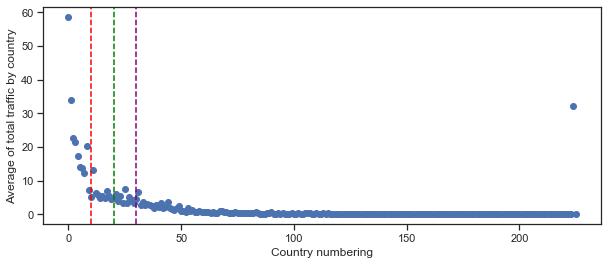

In [10]:
# How to set a cutline
plt.figure(figsize=(10,4))
plt.scatter(range(226), np.mean(np.sum(home_adj_list_raw, axis=0)[:226,:226], axis=0))
plt.axvline(x=10, linestyle='--', color='red')
plt.axvline(x=20, linestyle='--', color='green')
plt.axvline(x=30, linestyle='--', color='purple')
plt.ylabel("Average of total traffic by country")
plt.xlabel("Country numbering")

In [11]:
home_adj_list = np.array(home_adj_list_raw)[:,0:country_cutline,0:country_cutline]

In [12]:
week_slices = pd.date_range('2016-01-04', periods=200, freq='W')

In [13]:
travel_df = pd.read_csv('../csv/global_travel_df.csv')
countries = travel_df['node'].unique().T

In [14]:
with open('../pkl/new_country_order.pkl', 'rb') as f:
    new_order = pickle.load(f) 

In [15]:
countries[new_order]

array(['US', 'GB', 'FR', 'ES', 'IT', 'DE', 'MX', 'CA', 'JP', 'NL', 'BR',
       'TH', 'ID', 'MY', 'SG', 'BE', 'AE', 'AU', 'CH', 'PH', 'IE', 'PT',
       'AR', 'TR', 'RU', 'KW', 'CN', 'IN', 'HK', 'AT', 'GR', 'KR', 'SA',
       'CO', 'SE', 'ZA', 'TW', 'CZ', 'DK', 'CL', 'NO', 'PE', 'PL', 'NZ',
       'EG', 'VN', 'QA', 'HU', 'DO', 'MA', 'IS', 'FI', 'HR', 'CR', 'BH',
       'LU', 'BS', 'IL', 'UY', 'CU', 'VE', 'UA', 'JM', 'VA', 'EC', 'PA',
       'CY', 'NG', 'JO', 'RS', 'RO', 'PY', 'LK', 'CD', 'KE', 'BG', 'MC',
       'MM', 'KH', 'MO', 'LB', 'LV', 'SI', 'PK', 'OM', 'BB', 'GU', 'HN',
       'BD', 'BO', 'TZ', 'AW', 'SK', 'IR', 'EE', 'GH', 'GE', 'BA', 'MT',
       'ZW', 'SY', 'AD', 'AZ', 'GT', 'MV', 'IM', 'SV', 'ET', 'BW', 'NP',
       'PR', 'BY', 'ME', 'DZ', 'KY', 'LT', 'BZ', 'TT', 'TC', 'NI', 'IQ',
       'SX', 'CW', 'LA', 'UG', 'MU', 'TN', 'HT', 'BN', 'KZ', 'MK', 'AG',
       'GI', 'GP', 'MZ', 'RW', 'AM', 'MQ', 'LC', 'PF', 'SC', 'SN', 'GL',
       'ZM', 'AO', 'AL', 'BM', 'SM', 'AF', 'CI', 'V

In [16]:
label_dict = dict(zip(np.char.mod('%d', range(226)), countries[new_order]))
label_dict = dict(zip(range(country_cutline), countries[new_order]))

In [17]:
# This is a dictionary of country numbers & their names
print(label_dict)

{0: 'US', 1: 'GB', 2: 'FR', 3: 'ES', 4: 'IT', 5: 'DE', 6: 'MX', 7: 'CA', 8: 'JP', 9: 'NL', 10: 'BR', 11: 'TH', 12: 'ID', 13: 'MY', 14: 'SG', 15: 'BE', 16: 'AE', 17: 'AU', 18: 'CH', 19: 'PH', 20: 'IE', 21: 'PT', 22: 'AR', 23: 'TR', 24: 'RU', 25: 'KW', 26: 'CN', 27: 'IN', 28: 'HK', 29: 'AT'}


In [18]:
# np.sum(np.array(home_adj_list)[:,:,28],axis=1)


# location = home_adj_list[-6][:,28]
# visitors = np.argwhere(location>0).T[0]
# print(visitors)
# # comb = list(itertools.combinations(visitors, 2))
# # result = 0
# # for c in comb:
# #     result += 1 / spatial.distance.cosine(adjmat[c[0]], adjmat[c[1]])
# # if(len(visitors)*(len(visitors)-1) != 0):
# #     value =result/(len(visitors)*(len(visitors)-1))
# # else:
# #     value = None

In [19]:
from scipy.stats import entropy

# def socgeo_entropy(cnt_num, adjmat):
#     sum_vertical = np.sum(adjmat[:,cnt_num])+ 1e-20
#     pl =adjmat[:,cnt_num] / sum_vertical
#     return entropy(pl)
def socgeo_entropy(adjmat):
    sum_vertical = np.sum(adjmat, axis=0)+ 1e-20
    pl = adjmat / sum_vertical
    # calculate entropy
    entropylist = []
    for i in range(len(pl)):
        entropylist.append(entropy(pl[:,i]))
    return entropylist

In [20]:
# socgeo_entropy(np.array([[0,0.5],[1,0.5]]))
# adjmat = home_adj_list[0]
# location = adjmat[:,0]
# visitors = np.argwhere(location>0).T[0]

In [21]:
from scipy import spatial
import itertools

# def homogeneity(cnt_num, adjmat):
#     location = adjmat[:,cnt_num]
#     visitors = np.argwhere(location>0).T[0]
# #     adjmat[visitors]
#     comb = list(itertools.combinations(visitors, 2))
#     result = 0
#     for c in comb:
#         result += 1 - spatial.distance.cosine(adjmat[c[0]], adjmat[c[1]])
#     if(len(visitors)*(len(visitors)-1) != 0):
#         value =result/(len(visitors)*(len(visitors)-1))
#     else:
#         value = None
#     return value
def homogeneity(cnt_num, adjmat):
#     adjmat=(adjmat>0)*1
    location = adjmat[:,cnt_num]
    visitors = np.argwhere(location>0).T[0]
    comb = list(itertools.combinations(visitors, 2))
    result = 0
    for c in comb:
        cosdist = spatial.distance.cosine(adjmat[c[0]], adjmat[c[1]])
        if(cosdist!=0):
            result += (1/cosdist)
        else:
            continue
    if(len(visitors)*(len(visitors)-1) != 0):
        value =result/(len(visitors)*(len(visitors)-1))
    else:
        value = None
    return value

In [22]:
# for i in range(30):
#     print(homogeneity(i, adj_list[15]))

In [23]:
# def popularity(cnt_num, adjmat):
#     location = adjmat[:,cnt_num]
#     in_weight_sum = np.sum(location)
#     visitors = (np.argwhere(location>0).T[0])
#     num_of_neighbors = np.sum(visitors>=0)
#     return in_weight_sum/num_of_neighbors
def popularity(adjmat):
    in_weight_sum = np.sum(adjmat, axis=0)
    in_degree_sum = np.sum((adjmat>0), axis=0)+1e-20
    popul = np.divide(in_weight_sum, in_degree_sum)
    return popul

In [24]:
# popularity(adjmat)

In [25]:
# G= nx.from_numpy_array(adjmat, type='diGraph')
G = nx.from_numpy_matrix(home_adj_list[2], create_using=nx.DiGraph)
btwcent = nx.betweenness_centrality(G, weight='weight')
brokerage = np.array(list(btwcent.values()))

In [26]:
# adjmat[validx][:,validx].shape

In [27]:
def serial_brokerage(adj_list, plot=False):
    index = 0
    brokerage_list =[]
    for adjmat in adj_list:
        G = nx.from_numpy_matrix(adjmat, create_using=nx.DiGraph)
        btwcent = nx.betweenness_centrality(G, weight='weight')
        brokerage = np.array(list(btwcent.values()))
        brokerage_list.append(brokerage)
        if(plot is True):
            plt.figure(figsize=(12,5))
            plt.scatter(range(len(brokerage)),brokerage)
            plt.scatter([0,12],brokerage[[0,12]])
            plt.text(0,brokerage[0],'US')
            plt.text(12,brokerage[12],'GB')    
#             plt.title("index "+str(index)+ ". from:" + str(week_slices[156-52+4*index].strftime("%y/%m/%d")) + " to:" +str(week_slices[160-52+4*index].strftime("%y/%m/%d")))
            plt.ylabel("brokerage")
            plt.xlabel("country numbers")
        index+=1
    return brokerage_list

In [28]:
def serial_entropy(home_adj_list, plot=False):
    index =0
    entropy_list = []
    for adjmat in home_adj_list:
        ent = socgeo_entropy(adjmat)
        entropy_list.append(ent)
        if(plot is True):
            plt.figure(figsize=(12,5))
            plt.scatter(range(len(ent)), ent)
            plt.scatter([0,12], np.array(ent)[[0,12]])
            plt.text(0,np.array(ent)[0],'US')
            plt.text(12,np.array(ent)[12],'GB')    
#             plt.title("index "+str(index)+ ". from:" + str(week_slices[156-52+4*index].strftime("%y/%m/%d")) + " to:" +str(week_slices[160-52+4*index].strftime("%y/%m/%d")))
            plt.ylabel("Entropy")
            plt.xlabel("Country numbers")
        index += 1
    return entropy_list

In [29]:
def serial_popularity(adj_list, plot=False):
    index=0
    pop_list = []
    for adjmat in adj_list:
        pop = popularity(adjmat)
        pop_list.append(pop)
        if(plot is True):
            plt.figure(figsize=(12,5))
            plt.scatter(range(len(pop)), pop)
            plt.scatter([0,12], pop[[0,12]])
#             plt.title("index "+str(index)+ ". from:" + str(week_slices[156-52+4*index].strftime("%y/%m/%d")) + " to:" +str(week_slices[160-52+4*index].strftime("%y/%m/%d")))
            plt.text(0,pop[0],'US')
            plt.text(12,pop[12],'GB')      
            plt.ylabel("Average In-weight (popularity)")
            plt.xlabel("country numbers")
        index+=1
    return pop_list

In [30]:
def serial_homogeneity(home_adj_list, plot=False):
    index =0
    homo_list = []
    for adjmat in home_adj_list:
        hom=[]
        for i in range(len(adjmat)):
            hom.append(homogeneity(i, adjmat))
        hom = np.array(hom)
        homo_list.append(np.array(hom))
        if(plot is True):
            plt.figure(figsize=(12,5))
            plt.scatter(range(len(hom)), hom)
            plt.scatter([0,12], hom[[0,12]])
            plt.text(0,hom[0],'US')
            plt.text(12,hom[12],'GB') 
#             plt.title("index "+str(index)+ ". from:" + str(week_slices[156-52+4*index].strftime("%y/%m/%d")) + " to:" +str(week_slices[160-52+4*index].strftime("%y/%m/%d")))
            plt.ylabel("Homogeneity")
            plt.xlabel("country numbers")
        index +=1
    return homo_list

In [31]:
def valid_index(input_array):
    not_none_list = []
    for i in range(len(input_array)): 
        if(input_array[i] is not None):
            not_none_list.append(i)
    return np.array(not_none_list)

In [32]:
brokerage_list = serial_brokerage(adj_list)
pop_list = serial_popularity(adj_list)
entropy_list = serial_entropy(home_adj_list)
homo_list = serial_homogeneity(home_adj_list)

/Users/gimpuleumoe/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2664: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


In [33]:
pop_list[10]

array([18.30769231, 12.52631579,  7.9375    ,  7.        ,  7.16666667,
        5.6875    , 11.88888889,  6.        ,  5.28571429,  7.27272727,
        4.28571429,  4.55555556,  3.28571429,  4.72727273,  2.9       ,
        4.1       ,  2.9       ,  5.5       ,  3.        ,  4.42857143,
       10.        ,  4.25      ,  4.83333333,  1.6       ,  2.22222222,
        1.5       ,  5.75      ,  4.6       ,  3.75      ,  2.75      ])

In [34]:
validx = valid_index(homo_list[9])

             brokerage  popularity   entropy  homogeneity
brokerage     1.000000    0.223868  0.354399     0.152937
popularity    0.223868    1.000000  0.243592     0.359822
entropy       0.354399    0.243592  1.000000     0.331560
homogeneity   0.152937    0.359822  0.331560     1.000000


Text(0.5, 0.98, 'index 22. 4 weeks from:2019/09/15')

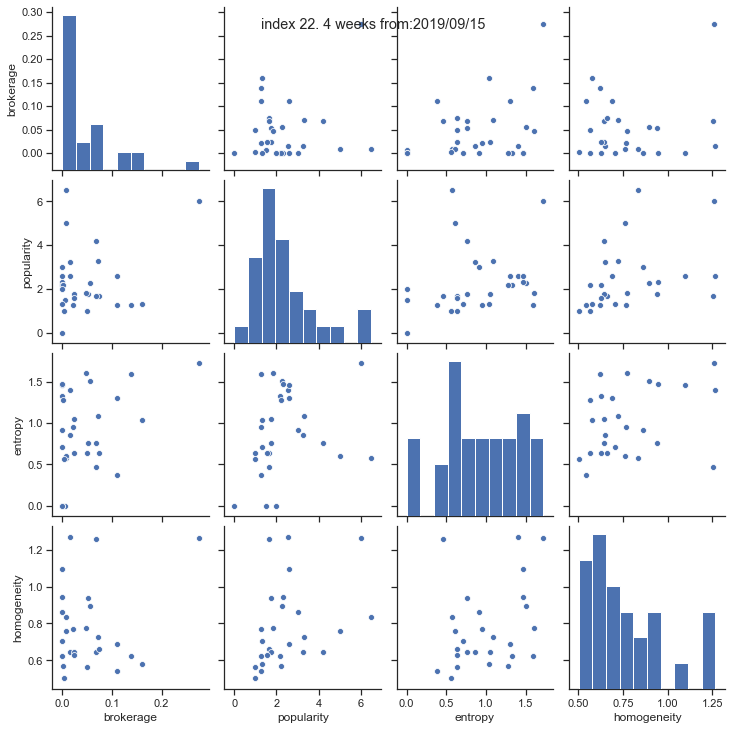

In [35]:
time_index = 22
# for time_index in range(11):
df = pd.DataFrame([brokerage_list[time_index], pop_list[time_index], entropy_list[time_index], homo_list[time_index]]).T
df.columns = ['brokerage','popularity','entropy','homogeneity']
#     print("index "+str(index)+ ". from:" + str(week_slices[156-52+4*index].strftime("%y/%m/%d")) + " to:" +str(week_slices[160-52+4*index].strftime("%y/%m/%d")))
print(df.corr())
g=sns.pairplot(df)
g.fig.suptitle("index "+str(time_index)+ ". 4 weeks from:" + str(week_slices[156-52+4*time_index].strftime("%Y/%m/%d")))


In [36]:
corr_list = []
for time_index in range(len(brokerage_list)):
    print(time_index)
    df = pd.DataFrame([brokerage_list[time_index], pop_list[time_index], entropy_list[time_index], homo_list[time_index]]).T
    df.columns = ['brokerage','popularity','entropy','homogeneity']
    corr_list.append(np.array(df.corr()))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [37]:
corr_list = np.array(corr_list)

In [38]:
df.columns

Index(['brokerage', 'popularity', 'entropy', 'homogeneity'], dtype='object')

In [39]:
print(week_slices[-1])
print(week_slices[107::4])

2019-11-03 00:00:00
DatetimeIndex(['2018-01-28', '2018-02-25', '2018-03-25', '2018-04-22',
               '2018-05-20', '2018-06-17', '2018-07-15', '2018-08-12',
               '2018-09-09', '2018-10-07', '2018-11-04', '2018-12-02',
               '2018-12-30', '2019-01-27', '2019-02-24', '2019-03-24',
               '2019-04-21', '2019-05-19', '2019-06-16', '2019-07-14',
               '2019-08-11', '2019-09-08', '2019-10-06', '2019-11-03'],
              dtype='datetime64[ns]', freq='4W-SUN')


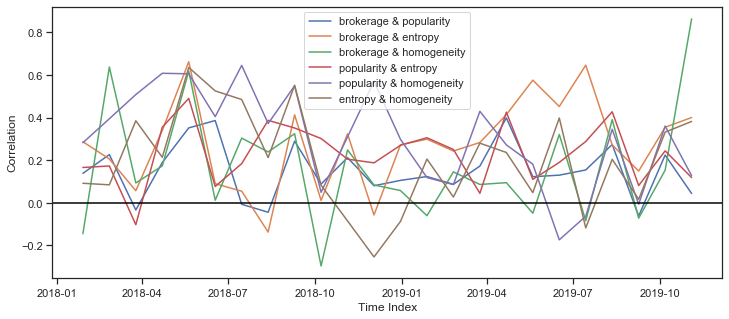

In [40]:
plt.figure(figsize=(12,5))
xaxis = week_slices[107::4]
plt.plot(xaxis, corr_list[:,0,1], label=(df.columns[0] +" & "+ df.columns[1]))
plt.plot(xaxis, corr_list[:,0,2], label=(df.columns[0] +" & "+ df.columns[2]))
plt.plot(xaxis, corr_list[:,0,3], label=(df.columns[0] +" & "+ df.columns[3]))
plt.plot(xaxis, corr_list[:,1,2], label=(df.columns[1] +" & "+ df.columns[2]))
plt.plot(xaxis, corr_list[:,1,3], label=(df.columns[1] +" & "+ df.columns[3]))
plt.plot(xaxis, corr_list[:,2,3], label=(df.columns[2] +" & "+ df.columns[3]))
plt.ylabel("Correlation")
plt.xlabel("Time Index")
plt.axhline(y=0, linestyle='-', color='black')
# plt.axvline(x=xaxis[-3], linestyle='--', color='red')
plt.legend()
plt.show()

In [41]:
print((df.columns[0] +" & "+ df.columns[1]), np.mean(corr_list[:,0,1]))
print((df.columns[0] +" & "+ df.columns[2]), np.mean(corr_list[:,0,2]))
print((df.columns[0] +" & "+ df.columns[3]), np.mean(corr_list[:,0,3]))
print((df.columns[1] +" & "+ df.columns[2]), np.mean(corr_list[:,1,2]))
print((df.columns[1] +" & "+ df.columns[3]), np.mean(corr_list[:,1,3]))
print((df.columns[2] +" & "+ df.columns[3]), np.mean(corr_list[:,2,3]))

brokerage & popularity 0.15190258240192225
brokerage & entropy 0.27515130825022577
brokerage & homogeneity 0.1722125363602853
popularity & entropy 0.23013700410620266
popularity & homogeneity 0.30270991661110963
entropy & homogeneity 0.20197105762628667


In [42]:
week_slices[156-52:-1:4]

DatetimeIndex(['2018-01-07', '2018-02-04', '2018-03-04', '2018-04-01',
               '2018-04-29', '2018-05-27', '2018-06-24', '2018-07-22',
               '2018-08-19', '2018-09-16', '2018-10-14', '2018-11-11',
               '2018-12-09', '2019-01-06', '2019-02-03', '2019-03-03',
               '2019-03-31', '2019-04-28', '2019-05-26', '2019-06-23',
               '2019-07-21', '2019-08-18', '2019-09-15', '2019-10-13'],
              dtype='datetime64[ns]', freq='4W-SUN')

In [43]:
['2019-01-06 ~ 2019-02-02', '2019-02-03 ~ 2019-03-02', '2019-03-03 ~ 2019-03-30', '2019-03-31 ~ 2019-04-27',
'2019-04-28 ~ 2019-05-25', '2019-05-26 ~ 2019-06-22', '2019-06-23 ~ 2019-07-20', '2019-07-21 ~ 2019-08-17',
'2019-08-18 ~ 2019-09-14', '2019-09-15 ~ 2019-10-12', '2019-10-13 ~ 2019-11-19']

['2019-01-06 ~ 2019-02-02',
 '2019-02-03 ~ 2019-03-02',
 '2019-03-03 ~ 2019-03-30',
 '2019-03-31 ~ 2019-04-27',
 '2019-04-28 ~ 2019-05-25',
 '2019-05-26 ~ 2019-06-22',
 '2019-06-23 ~ 2019-07-20',
 '2019-07-21 ~ 2019-08-17',
 '2019-08-18 ~ 2019-09-14',
 '2019-09-15 ~ 2019-10-12',
 '2019-10-13 ~ 2019-11-19']

In [44]:
homo_df = pd.DataFrame(homo_list)
homo_df.replace(to_replace=[None], value=np.nan, inplace=True)

In [45]:
np.nanmean(homo_df, axis=1)

array([1.13332587, 1.23917918, 1.13444783, 0.94556441, 1.02453989,
       0.96743911, 1.04655154, 1.27206296, 1.10584931, 1.39510744,
       1.16936083, 1.30425758, 1.09712415, 1.18296424, 1.23757074,
       0.95156636, 0.83490184, 0.97333259, 0.70138033, 1.43675588,
       0.69980446, 0.89215553, 0.77769798, 1.88019902])

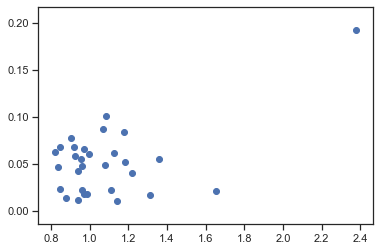

In [46]:
# plot mean homogeneity vs mean brokerage
homo_df = pd.DataFrame(homo_list)
homo_df.replace(to_replace=[None], value=np.nan, inplace=True)
mean_homo = np.nanmean(homo_df, axis=0)
mean_entropy = np.nanmean(entropy_list, axis=0)
mean_brokerage= np.mean(np.array(brokerage_list), axis=0)

plt.scatter(mean_homo, mean_brokerage)

In [47]:
week_slices[-20]

Timestamp('2019-06-23 00:00:00', freq='W-SUN')

In [48]:
xaxis[-3]
travel_tensors_raw[-3]

array([[0., 5., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 4., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
xaxis[-6]

Timestamp('2019-06-16 00:00:00', freq='4W-SUN')

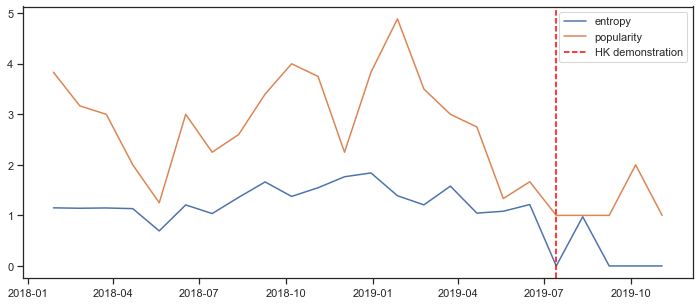

In [50]:
plt.figure(figsize=(12,5))
# plt.plot(xaxis, np.array(brokerage_list)[:,28], label="brokerage")
plt.plot(xaxis, np.array(entropy_list)[:,28], label="entropy")
# plt.plot(xaxis, np.array(homo_list)[:,28], label="homogeneity")
plt.plot(xaxis, np.array(pop_list)[:,28], label="popularity")
plt.axvline(x=xaxis[-5], linestyle='--', color='red', label="HK demonstration")
plt.legend()
# plt.plot(np.array(brokerage_list)[:,4])
# plt.plot(np.array(brokerage_list)[:,5])

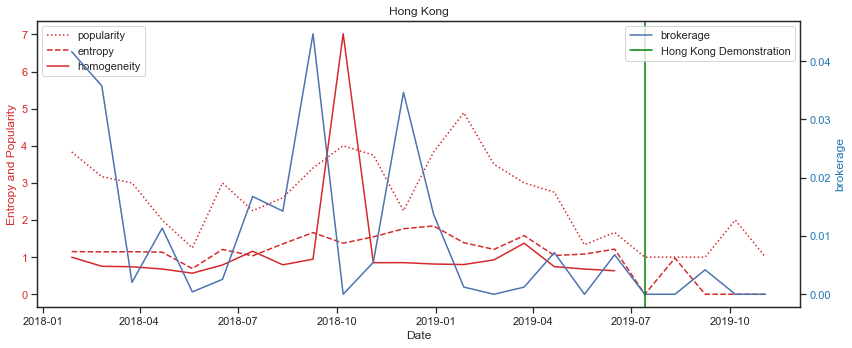

In [51]:
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
fig, ax1 = plt.subplots(figsize=(12,5))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Entropy and Popularity', color=color)
plt.plot(xaxis, np.array(pop_list)[:,28], label="popularity", color=color, linestyle='dotted')
ax1.plot(xaxis, np.array(entropy_list)[:,28], label="entropy", color=color, linestyle='--')
ax1.plot(xaxis, np.array(homo_list)[:,28], label="homogeneity", color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc=2)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('brokerage', color=color)  # we already handled the x-label with ax1
ax2.plot(xaxis, np.array(brokerage_list)[:,28], label="brokerage")
ax2.tick_params(axis='y', labelcolor=color)
plt.axvline(x=xaxis[-5], linestyle='-', color='green', label="Hong Kong Demonstration")
plt.legend(loc=1)
plt.title("Hong Kong")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

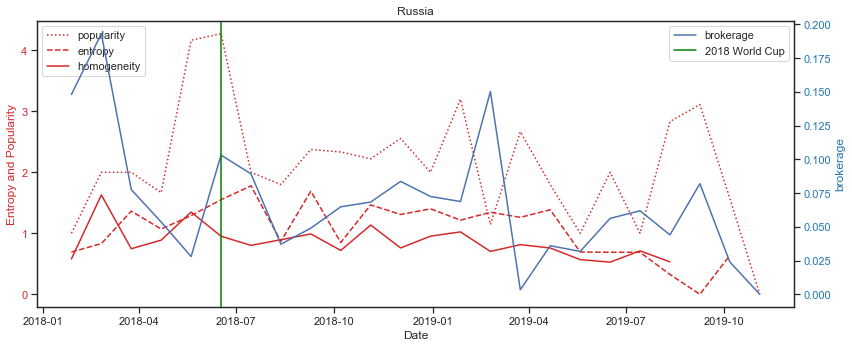

In [52]:
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
fig, ax1 = plt.subplots(figsize=(12,5))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Entropy and Popularity', color=color)
plt.plot(xaxis, np.array(pop_list)[:,24], label="popularity", color=color, linestyle='dotted')
ax1.plot(xaxis, np.array(entropy_list)[:,24], label="entropy", color=color, linestyle='--')
ax1.plot(xaxis, np.array(homo_list)[:,24], label="homogeneity", color=color, )
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc=2)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('brokerage', color=color)  # we already handled the x-label with ax1
ax2.plot(xaxis, np.array(brokerage_list)[:,24], label="brokerage")
ax2.tick_params(axis='y', labelcolor=color)
plt.axvline(x=xaxis[5], linestyle='-', color='green', label="2018 World Cup")
plt.legend(loc=1)
plt.title("Russia")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

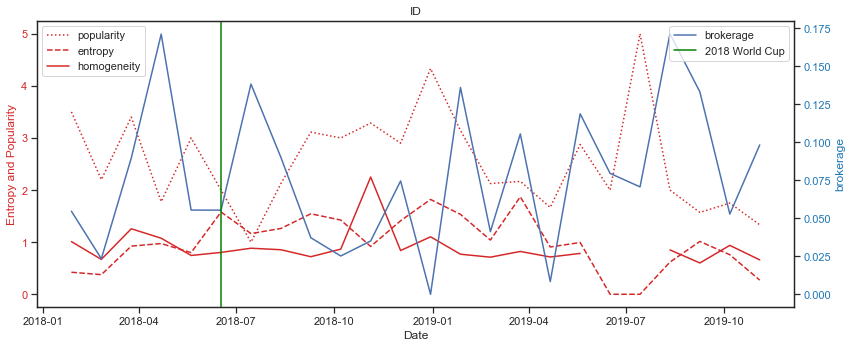

In [56]:
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
fig, ax1 = plt.subplots(figsize=(12,5))

cnt_num = 12

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Entropy and Popularity', color=color)
plt.plot(xaxis, np.array(pop_list)[:,cnt_num], label="popularity", color=color, linestyle='dotted')
ax1.plot(xaxis, np.array(entropy_list)[:,cnt_num], label="entropy", color=color, linestyle='--')
ax1.plot(xaxis, np.array(homo_list)[:,cnt_num], label="homogeneity", color=color, )
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc=2)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('brokerage', color=color)  # we already handled the x-label with ax1
ax2.plot(xaxis, np.array(brokerage_list)[:,cnt_num], label="brokerage")
ax2.tick_params(axis='y', labelcolor=color)
plt.axvline(x=xaxis[5], linestyle='-', color='green', label="2018 World Cup")
plt.legend(loc=1)
plt.title(label_dict[cnt_num])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [109]:
def scale(array):
    array = [0 if (v is None) else v for v in array]
    array = [0 if (np.isnan(v)) else v for v in array]
    mx = np.max(array)
    mi = np.min(array)
    return (array-mi)/(mx-mi)*10

In [243]:
cnt_num=12
B = scale(np.array(brokerage_list)[:,cnt_num])
P = scale(np.array(pop_list)[:,cnt_num])
E = scale(np.array(entropy_list)[:,cnt_num])
H = scale(np.array(homo_list)[:,cnt_num])


In [244]:
total_array = B + P + E + H
BPEH = (total_array - np.mean(total_array))/np.std(total_array)

In [245]:
out_w = np.sum(np.array(adj_list)[:,cnt_num,:], axis=1)
in_w = np.sum(np.array(adj_list)[:,:,cnt_num], axis=1)
out_d = np.sum(np.array(adj_list)[:,cnt_num,:]>0, axis=1)
in_d = np.sum(np.array(adj_list)[:,:,cnt_num]>0, axis=1)

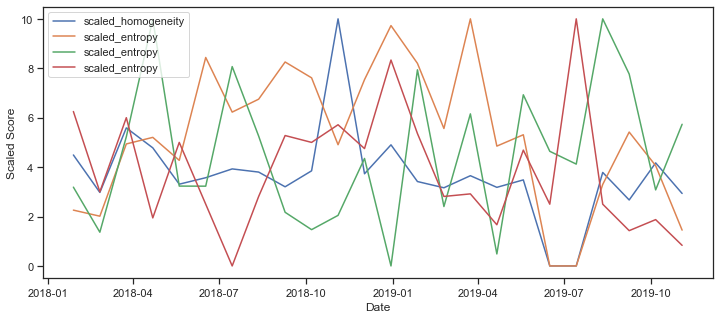

In [242]:
plt.figure(figsize=(12,5))
plt.plot(xaxis, H, label = "scaled_homogeneity")
plt.plot(xaxis, E, label = "scaled_entropy")
plt.plot(xaxis, B, label = "scaled_entropy")
plt.plot(xaxis, P, label = "scaled_entropy")


# plt.axvline(x=xaxis[10], linestyle='-', color='green')
# plt.title("Indonesia")
plt.ylabel("Scaled Score")
plt.xlabel("Date")
plt.legend()

In [260]:
np.array([B,P,E,H]).T.shape

(24, 4)

In [276]:
from sklearn.neighbors import LocalOutlierFactor
X = np.array([B,P,E,H]).T
clf = LocalOutlierFactor(n_neighbors=5, contamination=0.1)
clf.fit(X)
neg_scores = clf.negative_outlier_factor_
#     lof_scores = (np.max(neg_scores) - neg_scores)/(np.max(neg_scores) - np.min(neg_scores))
lof_scores = neg_scores * -1

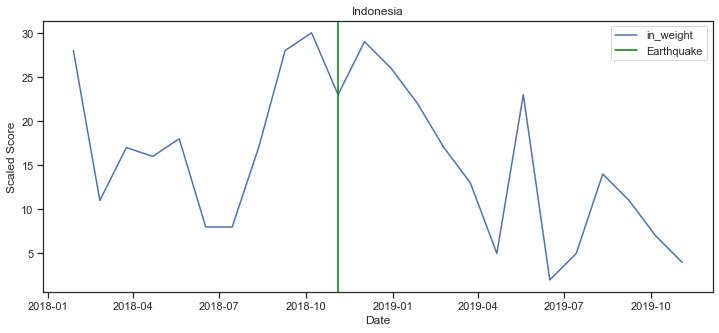

In [293]:
plt.figure(figsize=(12,5))
# plt.plot(xaxis, scale(lof_scores), label = "LOF")
# plt.plot(xaxis, in_w, label = "scaled_homogeneity")
plt.plot(xaxis, in_w, label = "in_weight")

plt.axvline(x=xaxis[10], linestyle='-', color='green', label = 'Earthquake')
plt.title("Indonesia")
plt.ylabel("Scaled Score")
plt.xlabel("Date")
plt.legend()

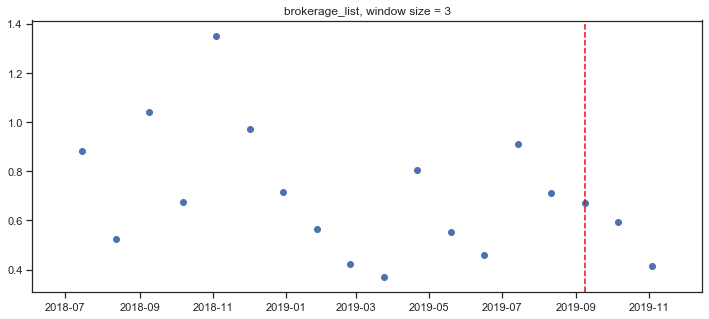

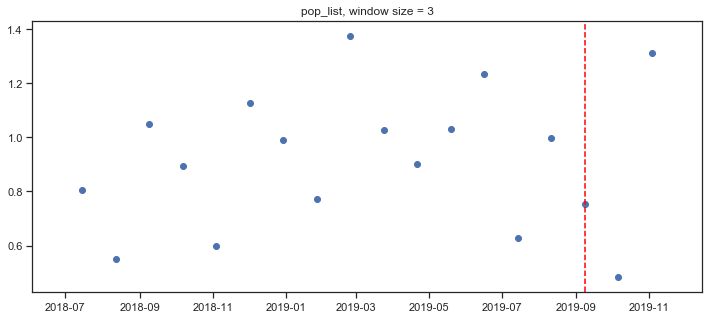

In [53]:
W = 3
# feat_arr = [out_d_ar, out_w_ar, in_d_ar, in_w_ar, neig_ar, recep_n_ar, tri_ar, avg_iw_ar, avg_ow_ar, max_iw_ar, max_ow_ar, max_wr_ar]
feat_arr = [brokerage_list, pop_list] # , entropy_list, homo_list
feat_title = ['brokerage_list', 'pop_list','entropy_list','homo_list']
z_collection = []
iter = 0
#############################################################################
# different pattern from LOF of TBAD
# more stationary. 
# in_d: reasoanble seasonality. star to incrase from July
#############################################################################
for feature in feat_arr:
    feat = feature # out_w_ar, recep_n_ar
    cov_series = []
    for t in range(W, len(feat)):
        C = np.cov(np.array(feat)[t-W:t].T)
        cov_series.append(C)

    u1_list = []
    for i in cov_series:
        U, S, V =np.linalg.svd(i)
        u1_list.append(U[:,0])

    z_list = []
    for i in range(W, len(u1_list)):
        utv = np.dot(u1_list[i], np.mean(np.array(u1_list[i-W:i]), axis=0))
        z = 1-1* utv
        z_list.append(z)
    #############################################################################

#     week_slices = pd.date_range('2016-01-04', periods=200, freq='W')
    plt.figure(figsize=(12,5))
    plt.scatter(xaxis[2*W:],z_list)
#     plt.plot(xaxis[W+int(W/2)*1:-int(W/2)],z_list)
#     plt.plot(range(-Time_interval+2*W + 40, -40), z_list[40:-40])
    plt.title(feat_title[iter]+ ", window size = " +str(W))
    plt.axvline(x=xaxis[-3], linestyle='--', color='red')
    iter +=1
    #############################################################################
    z_collection.append(np.array(z_list))

In [54]:
print(np.array(brokerage_list)[:,28])
print(np.array(entropy_list)[:,28])
print(np.array(pop_list)[:,28])
print(np.array(homo_list)[:,28])

[0.04162855 0.03573481 0.00205255 0.01134    0.00041051 0.00256568
 0.01677956 0.01426519 0.04469906 0.         0.00548714 0.03465283
 0.01369048 0.00123153 0.         0.00123153 0.00714286 0.
 0.0067734  0.         0.         0.00419306 0.         0.        ]
[1.14967561 1.14175015 1.14707158 1.13386928 0.69314718 1.20751533
 1.03660419 1.35687359 1.66208935 1.37572396 1.54709263 1.76463005
 1.84029774 1.38911153 1.20842264 1.5791227  1.04516975 1.08219553
 1.21488965 0.         0.97431475 0.         0.         0.        ]
[3.83333333 3.16666667 3.         2.         1.25       3.
 2.25       2.6        3.4        4.         3.75       2.25
 3.83333333 4.88888889 3.5        3.         2.75       1.33333333
 1.66666667 1.         1.         1.         2.         1.        ]
[0.9989800509631813 0.7540225781116823 0.740995747945361
 0.6800705104529192 0.5676740750179635 0.7895391415401211
 1.158969885795534 0.7935516980041323 0.9444543716658971 7.01721424579265
 0.8500463320590785 0.8521

In [55]:
np.array(popularity)[:,29]

IndexError: too many indices for array

In [ ]:
label_dict
